# Calculation of the Secrecy Capacity

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig, Germany

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. This will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using `Shift+Return`

## Introduction

In the following, you will find two algorithms that allow calculating the secrecy capacity of a wiretap channel.

The first one is presented in the following publication
> [S. Loyka and C. D. Charalambous, "An Algorithm for Global Maximization of Secrecy Rates in Gaussian MIMO Wiretap Channels," IEEE Trans. Commun., vol. 63, no. 6, pp. 2288–2299, Jun. 2015.](https://doi.org/10.1109/TCOMM.2015.2424235)

The second is from the publication
> [T. Van Nguyen, Q.-D. Vu, M. Juntti, and L.-N. Tran, "A Low-Complexity Algorithm for Achieving Secrecy Capacity in MIMO Wiretap Channels," in ICC 2020 - 2020 IEEE International Conference on Communications (ICC), 2020.](https://doi.org/10.1109/ICC40277.2020.9149178)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from secrecy_capacity import secrecy_rate

## Preparation

In [6]:
# Number of Antennas
n_tx = 2
n_bob = 2
n_eve = 2

np.random.seed(10)
# (Random) Channel matrices
mat_bob = np.random.randn(n_bob, n_tx)
mat_eve = np.random.randn(n_eve, n_tx)

In [7]:
opt_cov = {}
sec_capac = {}
snr = np.arange(0, 11, 2)

### Algorithm 1

In [8]:
from secrecy_capacity import cov_secrecy_capacity_loyka

In [9]:
opt_cov[1] = []
sec_capac[1] = []
print("This will take a few minutes...\n")
for _snr in snr:
    power = 10**(_snr/10.)
    print("Working on SNR: {} dB".format(_snr))
    _opt_cov, (interm_res_norm, interm_sec_rate) = cov_secrecy_capacity_loyka(mat_bob, mat_eve, power=power, 
                                                                              step_size=2, alpha=.1, beta=.5,
                                                                              return_interm_results=True)
    _sec_cap = secrecy_rate(mat_bob, mat_eve, cov=_opt_cov)
    print("Secrecy capacity: {:.3f} bit".format(_sec_cap))
    print("Power constraint: {:.3f}.\tTrace of Cov: {:.3f}".format(power, np.trace(_opt_cov)))
    print("-"*60)
    opt_cov[1].append(_opt_cov)
    sec_capac[1].append(_sec_cap)

This will take a few minutes...

Working on SNR: 0 dB
Secrecy capacity: 2.196 bit
Power constraint: 1.000.	Trace of Cov: 1.000
------------------------------------------------------------
Working on SNR: 2 dB
Secrecy capacity: 2.665 bit
Power constraint: 1.585.	Trace of Cov: 1.585
------------------------------------------------------------
Working on SNR: 4 dB
Secrecy capacity: 3.141 bit
Power constraint: 2.512.	Trace of Cov: 2.512
------------------------------------------------------------
Working on SNR: 6 dB
Secrecy capacity: 3.605 bit
Power constraint: 3.981.	Trace of Cov: 3.981
------------------------------------------------------------
Working on SNR: 8 dB
Secrecy capacity: 4.036 bit
Power constraint: 6.310.	Trace of Cov: 6.310
------------------------------------------------------------
Working on SNR: 10 dB
Secrecy capacity: 4.419 bit
Power constraint: 10.000.	Trace of Cov: 10.000
------------------------------------------------------------


### Algorithm 2

In [10]:
from secrecy_capacity import cov_secrecy_capacity_low_complexity

In [11]:
opt_cov[2] = []
sec_capac[2] = []
for _snr in snr:
    power = 10**(_snr/10.)
    print("Working on SNR: {} dB".format(_snr))
    _opt_cov = cov_secrecy_capacity_low_complexity(mat_bob, mat_eve, power)
    _sec_cap = secrecy_rate(mat_bob, mat_eve, cov=_opt_cov)
    print("Secrecy capacity: {:.3f} bit".format(_sec_cap))
    print("Power constraint: {:.3f}.\tTrace of Cov: {:.3f}".format(power, np.real_if_close(np.trace(_opt_cov))))
    print("-"*60)
    opt_cov[2].append(_opt_cov)
    sec_capac[2].append(_sec_cap)

Working on SNR: 0 dB
Secrecy capacity: 2.196 bit
Power constraint: 1.000.	Trace of Cov: 1.000
------------------------------------------------------------
Working on SNR: 2 dB
Secrecy capacity: 2.665 bit
Power constraint: 1.585.	Trace of Cov: 1.585
------------------------------------------------------------
Working on SNR: 4 dB
Secrecy capacity: 3.141 bit
Power constraint: 2.512.	Trace of Cov: 2.512
------------------------------------------------------------
Working on SNR: 6 dB
Secrecy capacity: 3.604 bit
Power constraint: 3.981.	Trace of Cov: 3.981
------------------------------------------------------------
Working on SNR: 8 dB
Secrecy capacity: 4.036 bit
Power constraint: 6.310.	Trace of Cov: 6.310
------------------------------------------------------------
Working on SNR: 10 dB
Secrecy capacity: 4.419 bit
Power constraint: 10.000.	Trace of Cov: 10.000
------------------------------------------------------------


## Results

In [12]:
def plot_results(results):
    fig, axs = plt.subplots(num="Secrecy Capacity Results")
    axs.plot(snr, results[1], label="Loyka Algorithm")
    axs.plot(snr, results[2], label="Low Complexity Algorithm")
    axs.legend()

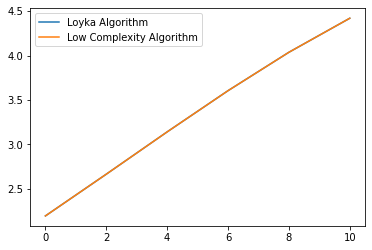

In [13]:
plot_results(sec_capac)

In [14]:
def plot_loyka_progress(res_norm, sec_rate):
    fig, axs = plt.subplots(num="Loyka Algorithm Progress")
    axs.semilogy(res_norm, label="Norm of the Residual")
    axs2 = axs.twinx()
    axs2.plot(sec_rate, c='orange', label="Secrecy Rate")
    fig.legend()

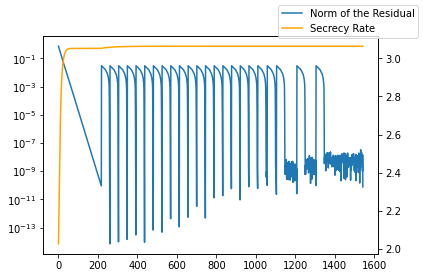

In [15]:
plot_loyka_progress(interm_res_norm, interm_sec_rate)

In [16]:
print(sec_capac)

{1: [2.1957697562837604, 2.665306724154586, 3.1411212336924934, 3.6045289885211043, 4.0364156256604, 4.419150655985078], 2: [2.1957697565412033, 2.6653067211627266, 3.140928900286918, 3.6043063793500525, 4.036415550787312, 4.419150596722953]}
